In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import os
import sys
import matplotlib.pyplot as plt

project_root = os.path.dirname(os.getcwd())

# Add Project Root to sys.path so we can import from 'src' and 'tests'
if project_root not in sys.path:
    sys.path.append(project_root)

from tests.test_indicators import *
from src.core.indicators import *

full_path = os.path.join(project_root, "data", "easylanguage_indicators","indicators_plot_NQ.csv")

data_NQ = pd.read_csv(full_path)
data_NQ_close = pd.to_numeric(data_NQ["Close"], errors="coerce")
data_NQ_composite_rsi = pd.to_numeric(data_NQ["CompositeRSI"], errors="coerce")

In [8]:
# --- LOGIC and BOUNDS---
# Perfect Uptrend 100
rsi = RSIIndicator(period=2)
bull_prices = pd.Series([10.0, 20.0, 30.0, 40.0])
val_bull = rsi.compute(bull_prices.iloc[:3])

if val_bull == 100.0:
    print("Perfect Uptrend check -> 100.0")
else:
    print(f"Perfect Uptrend check failed ({val_bull})")

# Perfect Downtrend 0
bear_rsi = RSIIndicator(period=2)
bear_prices = pd.Series([50.0, 40.0, 30.0, 20.0])
val_bear = bear_rsi.compute(bear_prices.iloc[:3])

if val_bear == 0.0:
    print("Perfect Downtrend check -> 0.0")
else:
    print(f"Perfect Downtrend check failed ({val_bear})")

Perfect Uptrend check -> 100.0
Perfect Downtrend check -> 0.0


In [9]:
# --- RECURSIVE STATE ---
rsi_state = RSIIndicator(period=14)
prices = pd.Series([100, 102, 104, 103, 105, 107, 106] + [110]*20)

# Init State
rsi_state.compute(prices.iloc[:15])
state_gain_1 = rsi_state.avg_gain

# Update State
rsi_state.compute(prices.iloc[:16])
state_gain_2 = rsi_state.avg_gain

if state_gain_1 != -1.0 and state_gain_1 != state_gain_2:
    print("Recursive update changed internal state as expected")
else:
    print(f"State update check failed: state did not update (Old: {state_gain_1}, New: {state_gain_2})")

Recursive update changed internal state as expected


In [12]:
results = test_composite_rsi(data_NQ_close, data_NQ_composite_rsi, short_period=2, long_period=24, warmup=100)

REPORT
MSE:  0.000012
Max Error:      0.0429
Mismatches:     0 / 6398 rows


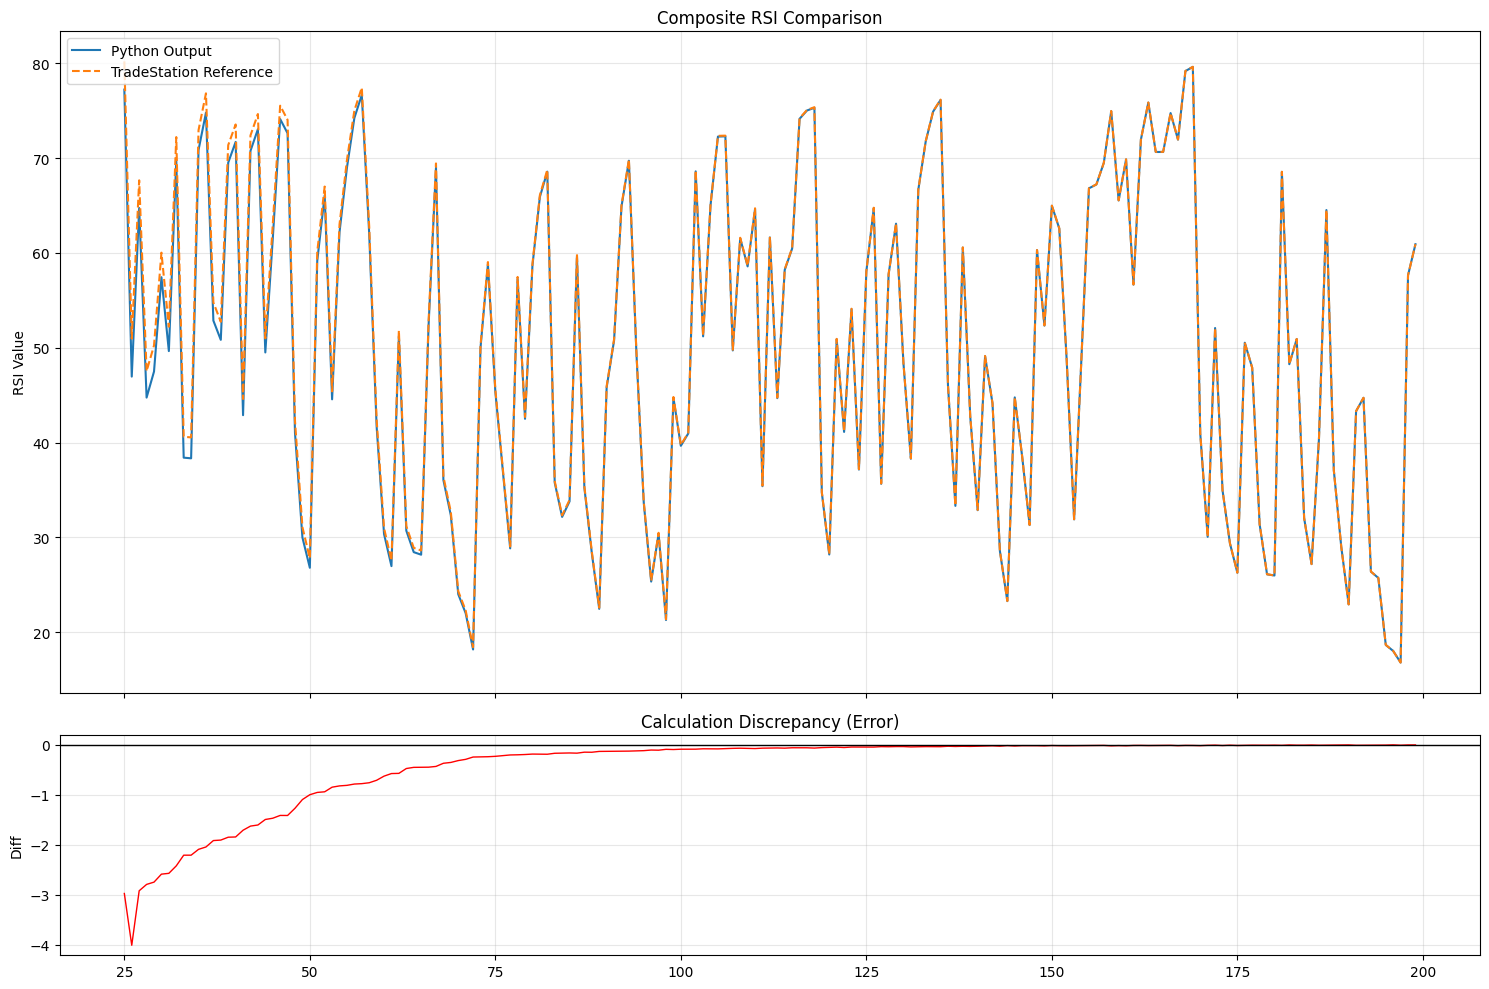

In [22]:
# PLOT RESULTS
if 'comparison_df' in results:
    df_plot = results['comparison_df']
    
    # Slice the first 200 tickers for a zoomed-in view (skipping warmup)
    zoom_slice = df_plot.iloc[25:200]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
    
    # Plot Indicators
    ax1.plot(zoom_slice.index, zoom_slice['Python'], label='Python Output', color='#1f77b4', linewidth=1.5)
    ax1.plot(zoom_slice.index, zoom_slice['TradeStation'], label='TradeStation Reference', color='#ff7f0e', linestyle='--', linewidth=1.5)
    ax1.set_title(f"Composite RSI Comparison")
    ax1.set_ylabel("RSI Value")
    ax1.legend(loc="upper left")
    ax1.grid(True, alpha=0.3)
    
    # Plot Error to look at indicator convergence
    ax2.plot(zoom_slice.index, zoom_slice['Diff'], color='red', label='Error (Diff)', linewidth=1)
    ax2.axhline(0, color='black', linewidth=1, linestyle='-')
    ax2.set_title("Calculation Discrepancy (Error)")
    ax2.set_ylabel("Diff")
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
